In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# Load dataset
df = pd.read_csv("cricket.csv")

# Preview data
df.head()

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [5]:
# Dataset info
df.info()

# Statistical overview
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
count,425119.000000,4.251190e+05,425119,425119,425119,425119,425119.000000,425119.000000,425119.000000,425119,...,425119,425119.000000,425119.00000,425119.000000,425119.000000,425119.000000,23659.000000,23659.000000,425119.000000,425119.000000
unique,NaN,NaN,1115,183,96,95,NaN,NaN,NaN,2899,...,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2022-07-15,Dubai International Cricket Stadium,Pakistan,Pakistan,NaN,NaN,NaN,V Kohli,...,Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1848,20388,26344,23221,NaN,NaN,NaN,2798,...,31054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,212559.000000,1.089415e+06,NaN,NaN,NaN,NaN,1.471172,9.959395,3.486377,NaN,...,NaN,0.483994,14.71182,13.952406,12.486560,12.138455,15.386280,13.853502,1.187710,0.959811
std,122721.428881,3.224052e+05,NaN,NaN,NaN,NaN,0.499169,5.633134,1.708903,NaN,...,NaN,0.499744,16.64172,15.976979,11.475981,11.336384,17.408768,11.983127,1.539459,0.196402
min,0.000000,2.110280e+05,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,...,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106279.500000,9.513730e+05,NaN,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,...,NaN,0.000000,2.00000,2.000000,4.000000,3.000000,2.000000,5.000000,0.000000,1.000000
50%,212559.000000,1.233980e+06,NaN,NaN,NaN,NaN,1.000000,10.000000,3.000000,NaN,...,NaN,0.000000,9.00000,8.000000,9.000000,9.000000,9.000000,10.000000,1.000000,1.000000
75%,318838.500000,1.310948e+06,NaN,NaN,NaN,NaN,2.000000,15.000000,5.000000,NaN,...,NaN,1.000000,21.00000,20.000000,18.000000,18.000000,22.000000,20.000000,1.000000,1.000000


In [7]:
# Drop non-informative columns
df = df.drop(columns=[
    'Unnamed: 0',
    'Match ID',
    'Date'
])

df.head()

,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,WD Parnell,1,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,WD Parnell,1,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,WD Parnell,0,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,WD Parnell,0,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,WD Parnell,4,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [9]:
# Remove rows with missing outcome
df_clean = df[df['Chased Successfully'].notna()]

df_clean.shape

(425119, 32)

In [13]:
# Define performance classification
def classify_performance(row):
    if row['Wicket'] == 1 or row['Runs From Ball'] >= 4:
        return 'High'
    elif row['Runs From Ball'] >= 1:
        return 'Medium'
    else:
        return 'Low'

# Apply function
df_clean['Performance_Level'] = df_clean.apply(classify_performance, axis=1)

# Check class distribution
df_clean['Performance_Level'].value_counts()
# yo chai garnai parxa hai 

Performance_Level
Medium    204148
Low       137579
High       83392
Name: count, dtype: int64

In [15]:
# Target variable
y = df_clean['Performance_Level']

# Feature set (avoid leakage)
X = df_clean.drop(columns=[
    'Performance_Level',
    'Chased Successfully',
    'Winner'
])

In [19]:
# Encode categorical features
X_encoded = X.copy()
encoder = LabelEncoder()

for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = encoder.fit_transform(X_encoded[col].astype(str))

# Encode target
y_encoded = encoder.fit_transform(y)

X_encoded.head()

,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,Batter Runs,...,Runs to Get,Balls Remaining,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,151,94,79,1,1,1,420,1377,2065,1,...,NaN,119,1,0,1,0,NaN,NaN,1,1
1,151,94,79,1,1,2,1390,418,2065,1,...,NaN,118,1,1,1,1,NaN,NaN,1,1
2,151,94,79,1,1,3,420,1377,2065,0,...,NaN,117,0,1,0,1,1.0,2.0,0,1
3,151,94,79,1,1,4,1131,1377,2065,0,...,NaN,116,0,1,1,1,NaN,NaN,0,1
4,151,94,79,1,1,5,1131,1377,2065,4,...,NaN,115,4,1,2,1,NaN,NaN,4,1


In [21]:
# Clean invalid values
X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan)
X_encoded = X_encoded.fillna(0)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [26]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
# screenshot garne hai

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16678
           1       1.00      1.00      1.00     27516
           2       1.00      1.00      1.00     40830

    accuracy                           1.00     85024
   macro avg       1.00      1.00      1.00     85024
weighted avg       1.00      1.00      1.00     85024



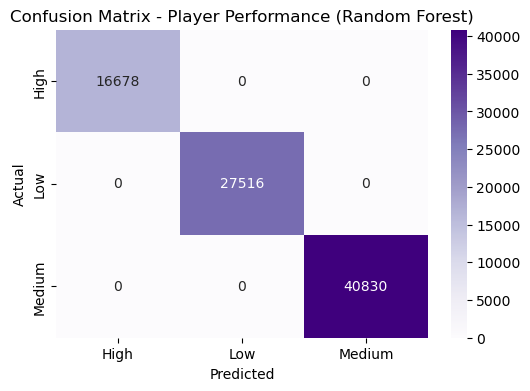

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Purples',
    xticklabels=['High', 'Low', 'Medium'],
    yticklabels=['High', 'Low', 'Medium']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Player Performance (Random Forest)")
plt.show()